In [ ]:
# This will load the dataset.You will see a folder called ALL in your workspace.
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/SER.zip"
!unzip -qo SER.zip
!rm SER.zip

--2025-02-16 07:23:27--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/SER.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.19, 16.12.40.51, 52.219.158.15, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100987649 (96M) [application/zip]
Saving to: ‘SER.zip’

SER.zip             100%[===================>]  96.31M  13.0MB/s    in 20s     

2025-02-16 07:23:48 (4.76 MB/s) - ‘SER.zip’ saved [100987649/100987649]



In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical  # Corrected import
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
Savee = "ALL/"

In [4]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
data_path = pd.concat([emotion_df, path_df], axis=1)
data_path.head()

,Emotions,Path
0,surprise,ALL/JK_su14.wav
1,angry,ALL/KL_a05.wav
2,happy,ALL/DC_h10.wav
3,neutral,ALL/JE_n12.wav
4,surprise,ALL/JE_su01.wav


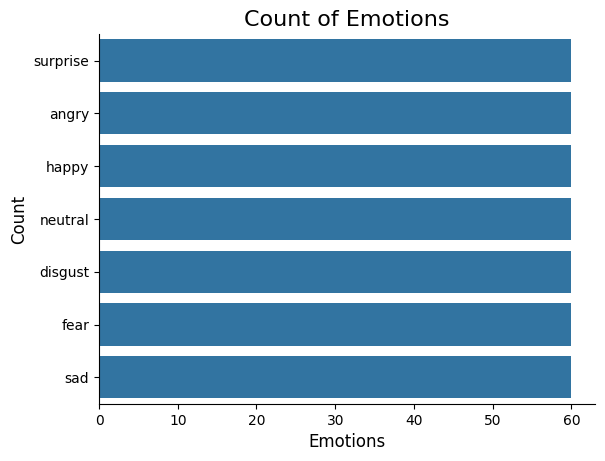

In [5]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [6]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


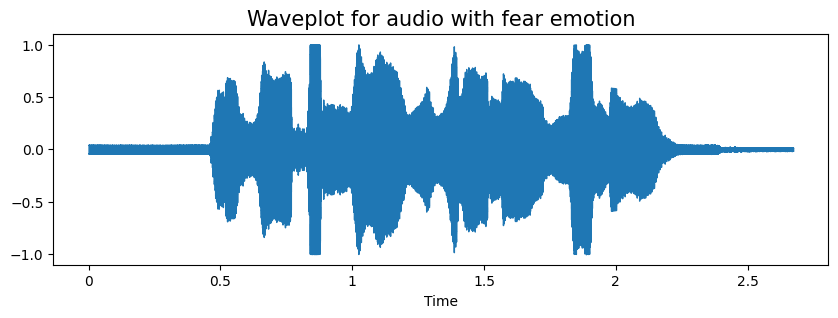

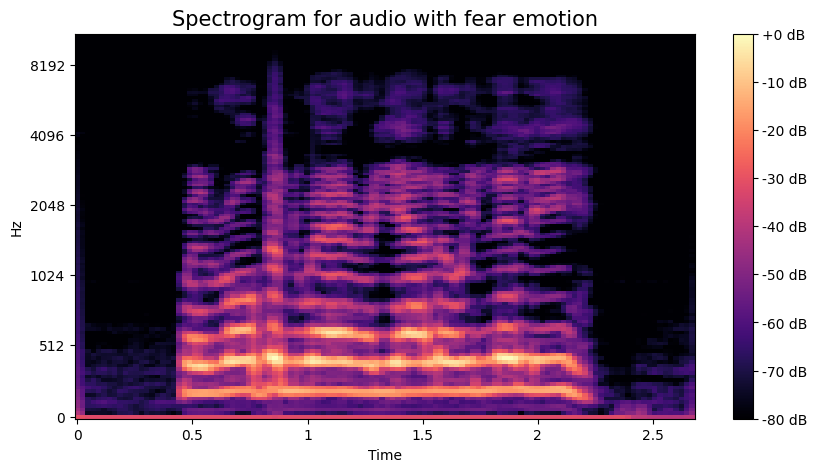

In [7]:
# Define the emotion
emotion = 'fear'

# Get the path of the audio file corresponding to the emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create a waveplot
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)  # Updated from waveplot to waveshow
    plt.show()

# Create a spectrogram
def create_spectrogram(data, sr, e):
    plt.figure(figsize=(10, 5))
    plt.title(f'Spectrogram for audio with {e} emotion', size=15)
    spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                             sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Generate the waveplot and spectrogram
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


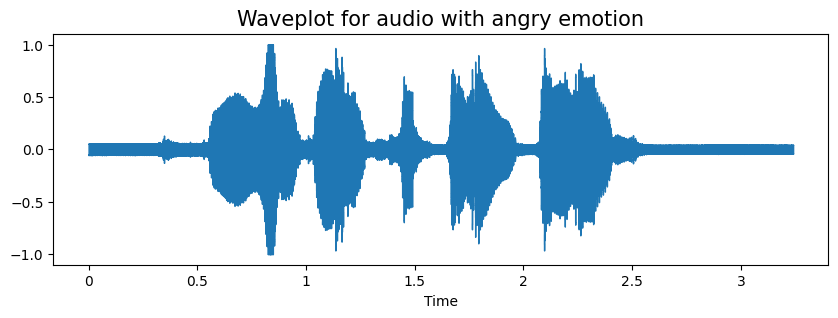

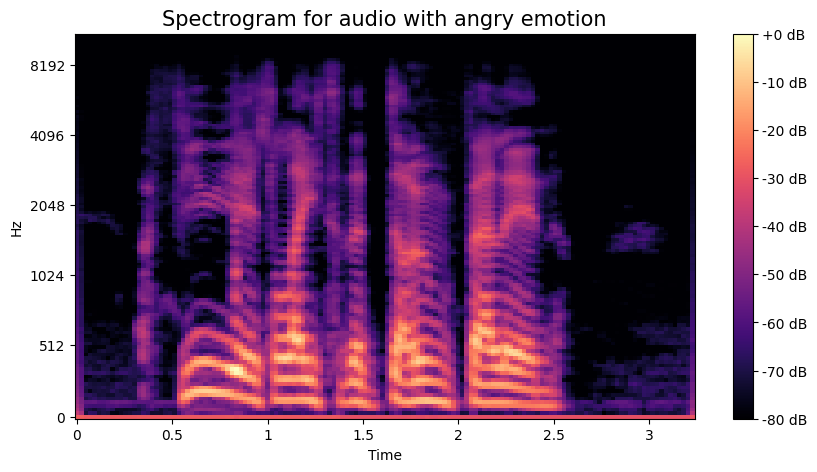

In [8]:
# Define the emotion
emotion = 'angry'

# Get the path of the audio file corresponding to the emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create a waveplot
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)  # Updated from waveplot to waveshow
    plt.show()

# Create a spectrogram
def create_spectrogram(data, sr, e):
    plt.figure(figsize=(10, 5))
    plt.title(f'Spectrogram for audio with {e} emotion', size=15)
    spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                             sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Generate the waveplot and spectrogram
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)

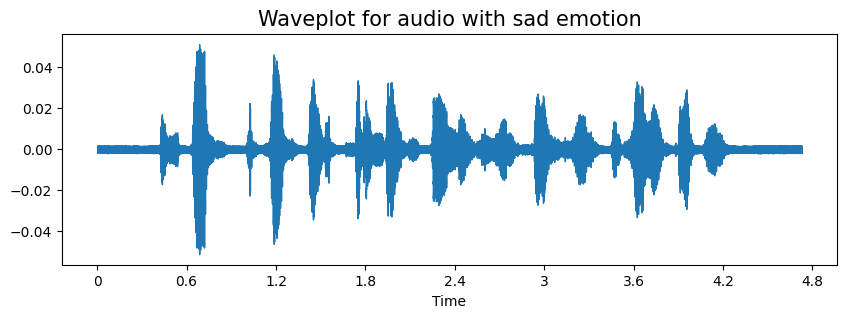

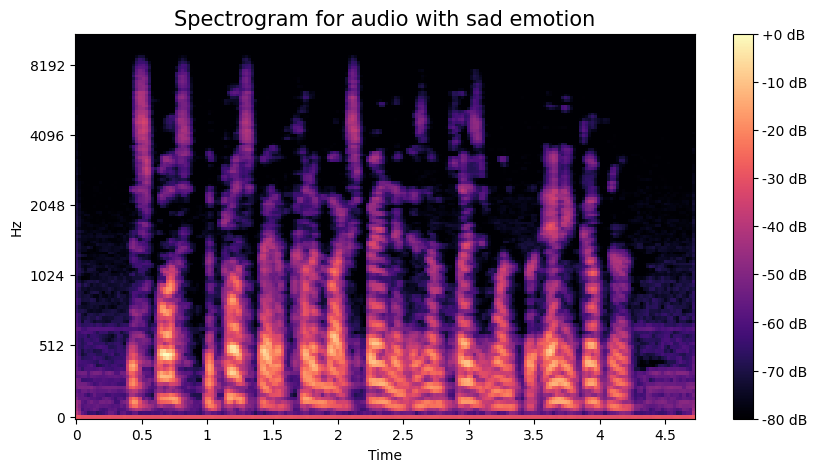

In [9]:
# Define the emotion
emotion = 'sad'

# Get the path of the audio file corresponding to the emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create a waveplot
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)  # Updated from waveplot to waveshow
    plt.show()

# Create a spectrogram
def create_spectrogram(data, sr, e):
    plt.figure(figsize=(10, 5))
    plt.title(f'Spectrogram for audio with {e} emotion', size=15)
    spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                             sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Generate the waveplot and spectrogram
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


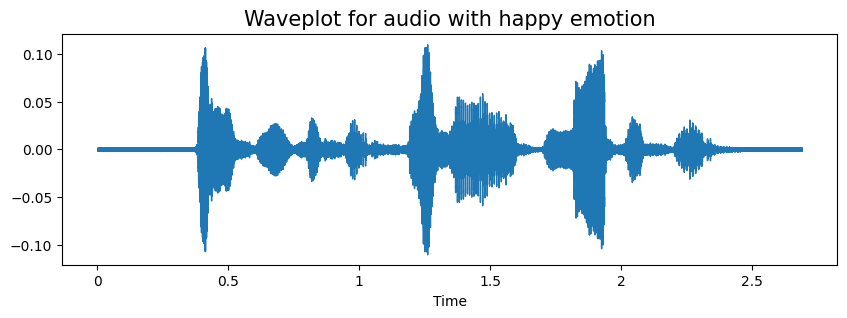

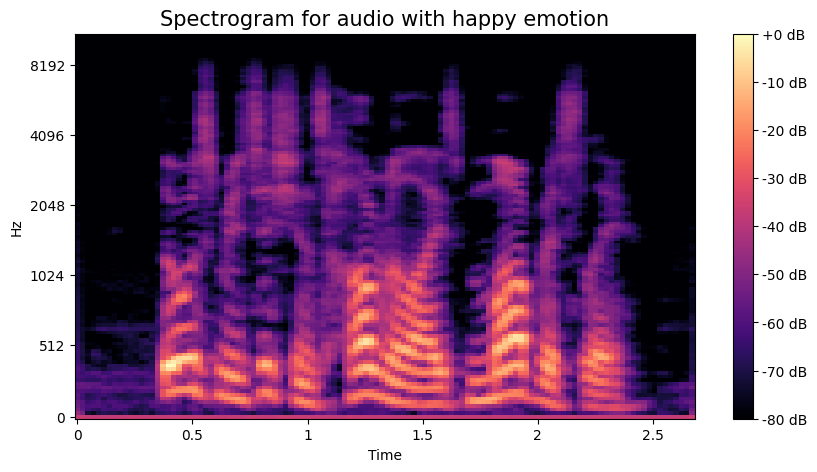

In [10]:
# Define the emotion
emotion = 'happy'

# Get the path of the audio file corresponding to the emotion
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Create a waveplot
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)  # Updated from waveplot to waveshow
    plt.show()

# Create a spectrogram
def create_spectrogram(data, sr, e):
    plt.figure(figsize=(10, 5))
    plt.title(f'Spectrogram for audio with {e} emotion', size=15)
    spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max),
                             sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Generate the waveplot and spectrogram
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


In [11]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

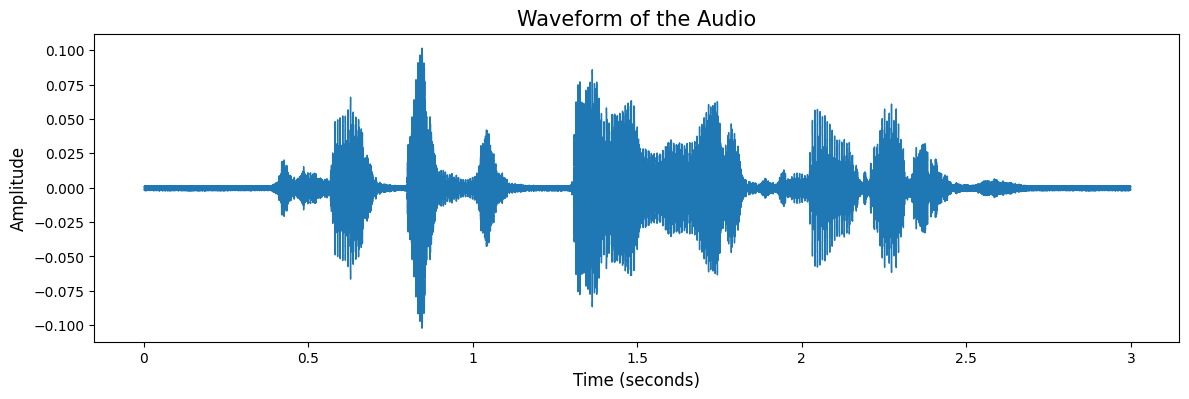

In [12]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sampling_rate)  # Replaced waveplot with waveshow
plt.title("Waveform of the Audio", fontsize=15)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.show()

# Play the audio
Audio(path)


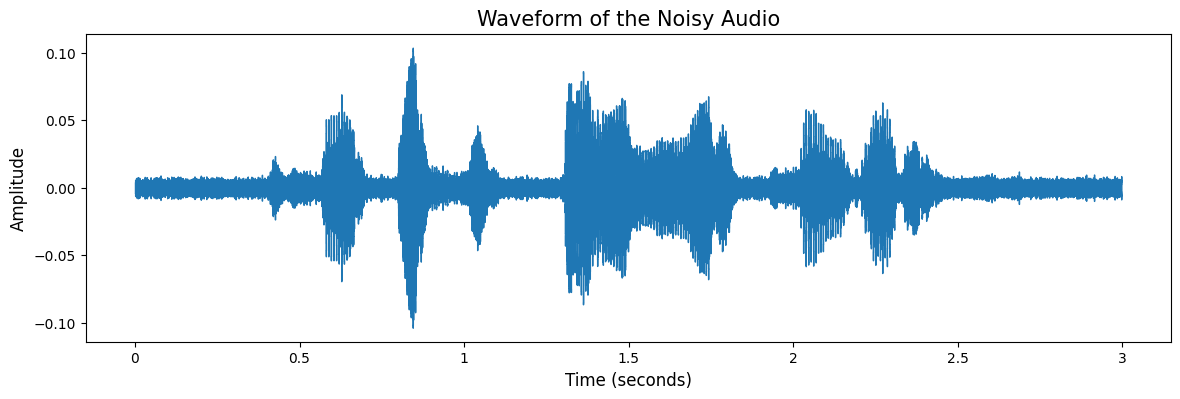

In [13]:
# Apply noise to the audio data
x = noise(data)

# Plot the waveform of the modified audio
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sampling_rate)  # Replaced waveplot with waveshow
plt.title("Waveform of the Noisy Audio", fontsize=15)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.show()

# Play the noisy audio
Audio(x, rate=sampling_rate)

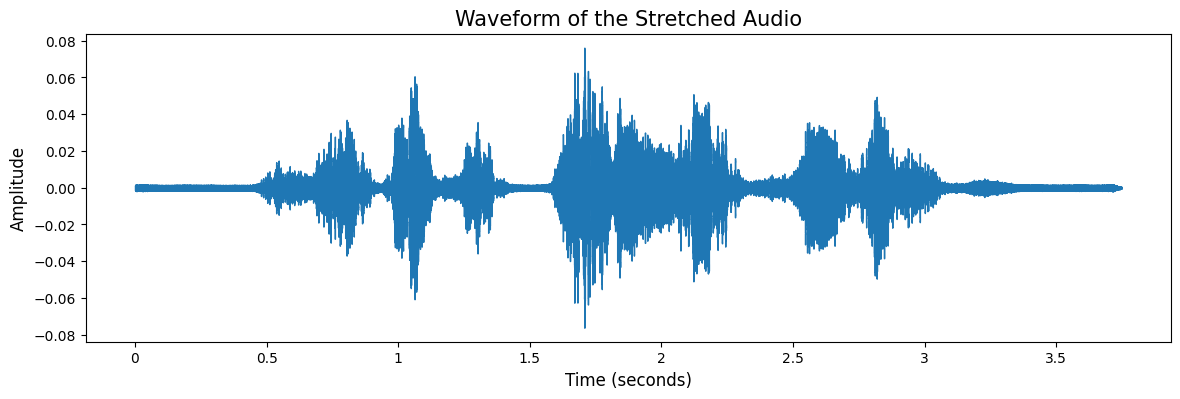

In [14]:
# Define the stretch function correctly
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)  # Ensure rate is passed as a keyword argument

# Apply time-stretching to the audio data
x = stretch(data)

# Plot the waveform of the stretched audio
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sampling_rate)  # Replaced waveplot with waveshow
plt.title("Waveform of the Stretched Audio", fontsize=15)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.show()

# Play the stretched audio
Audio(x, rate=sampling_rate)

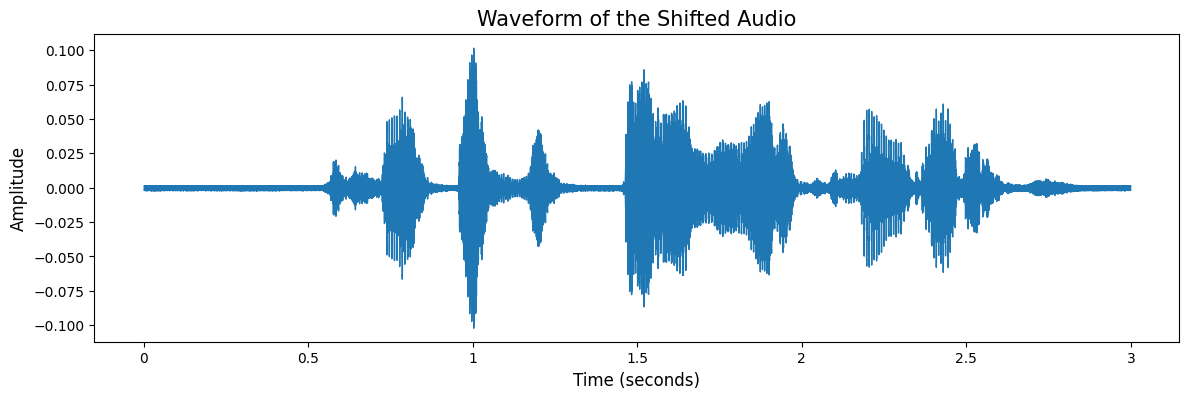

In [15]:
# Apply shifting to the audio data
x = shift(data)

# Plot the waveform of the shifted audio
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sampling_rate)  # Replaced waveplot with waveshow
plt.title("Waveform of the Shifted Audio", fontsize=15)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.show()

# Play the shifted audio
Audio(x, rate=sampling_rate)

In [16]:
import librosa
import librosa.display  # Explicitly import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

def pitch(data, sampling_rate, pitch_factor=0.7):
    """
    Apply pitch shifting to audio data.

    Parameters:
    data: np.ndarray
        Input audio time series
    sampling_rate: int
        Sampling rate of the input audio
    pitch_factor: float
        Number of steps to shift the pitch. Can be positive or negative.
        Default is 0.7

    Returns:
    np.ndarray: Pitch-shifted audio time series
    """
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

def plot_waveform(audio_data, sampling_rate, title="Waveform"):
    """
    Plot the waveform of audio data
    """
    plt.figure(figsize=(14, 4))
    librosa.display.waveshow(y=audio_data, sr=sampling_rate)
    plt.title(title, fontsize=15)
    plt.xlabel("Time (seconds)", fontsize=12)
    plt.ylabel("Amplitude", fontsize=12)
    plt.tight_layout()  # Ensure proper spacing
    plt.show()  # Explicitly call show()
    plt.close()  # Clean up the figure

# Example usage:
# Assuming you have your audio data loaded as 'data' with 'sampling_rate'
# x = pitch(data, sampling_rate)
# plot_waveform(x, sampling_rate, "Waveform of the Pitch-Shifted Audio")
# Audio(x, rate=sampling_rate)

In [17]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [18]:
# Extracting features and performing augmentations
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [19]:
len(X), len(Y), data_path.Path.shape

(1260, 1260, (420,))

In [20]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.079798,0.414724,0.444881,0.574793,0.753790,0.659569,0.469655,0.368974,0.332341,0.309543,...,1.365924e-04,5.780859e-05,3.945694e-05,2.650670e-05,1.540298e-05,1.878516e-05,1.353316e-05,9.261625e-06,5.370416e-07,surprise
1,0.110022,0.437093,0.470997,0.554863,0.751485,0.765322,0.539020,0.402419,0.355234,0.332548,...,4.620060e-03,4.232139e-03,4.818461e-03,4.315404e-03,4.357358e-03,4.480612e-03,4.232711e-03,4.290008e-03,4.307460e-03,surprise
2,0.076624,0.330317,0.324774,0.405045,0.585828,0.815496,0.671266,0.369957,0.264659,0.249989,...,1.068564e-04,3.988488e-05,1.758952e-05,9.977666e-06,6.219077e-06,4.695143e-06,3.703875e-06,2.519139e-06,1.198685e-07,surprise
3,0.033893,0.610785,0.566457,0.483762,0.445611,0.476427,0.513142,0.478430,0.462407,0.482043,...,5.295561e-08,3.996510e-08,3.505036e-08,3.182648e-08,2.960983e-08,2.640687e-08,2.424851e-08,1.640447e-08,3.758934e-09,angry
4,0.171621,0.728942,0.695408,0.628158,0.606185,0.626234,0.637265,0.573634,0.567276,0.598691,...,2.303740e-04,2.346196e-04,2.255125e-04,2.234928e-04,2.307924e-04,2.225180e-04,2.274898e-04,2.264532e-04,2.214949e-04,angry


In [21]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [22]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [23]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((945, 162), (945, 7), (315, 162), (315, 7))

In [24]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((945, 162), (945, 7), (315, 162), (315, 7))

In [25]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((945, 162, 1), (945, 7), (315, 162, 1), (315, 7))

In [26]:
# building the model:
from tensorflow import keras
model = keras.Sequential()


model.add(Flatten())
model.add(Dense(7, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
model = Sequential()
model.add(Conv1D(256, 8, padding='same',activation = 'relu',input_shape=(x_train.shape[1],1)))
model.add(Conv1D(256, 8, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same', activation='relu'))
model.add(Conv1D(128, 8, padding='same', activation='relu'))
model.add(Dropout(0.4))
model.add(Conv1D(128, 8, padding='same', activation='relu'))
model.add(Conv1D(128, 8, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same', activation='relu'))
model.add(Conv1D(64, 8, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt ,loss='categorical_crossentropy',metrics=['acc'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 162, 256)            │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 162, 256)            │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 162, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 162, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 20, 128)             │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 20, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 20, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 20, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 20, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 2, 64)               │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 2, 64)               │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,283,591 (4.90 MB)

 Trainable params: 1,282,823 (4.89 MB)

 Non-trainable params: 768 (3.00 KB)

In [27]:
checkpointer = ModelCheckpoint('speech_emotion.keras', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[checkpointer])


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.1802 - loss: 1.9660
Epoch 1: val_acc improved from -inf to 0.16190, saving model to speech_emotion.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - acc: 0.1814 - loss: 1.9636 - val_acc: 0.1619 - val_loss: 1.8990
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.2734 - loss: 1.7894
Epoch 2: val_acc improved from 0.16190 to 0.19048, saving model to speech_emotion.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.2725 - loss: 1.7878 - val_acc: 0.1905 - val_loss: 1.8419
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.2834 - loss: 1.6755
Epoch 3: val_acc did not improve from 0.19048
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.2838 - loss: 1.6742 - val_acc: 0.1683 - val_loss: 1.8466
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.3049 - loss: 1.5867
Epoch 4: val_acc did not improve from 0.19048
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - acc: 0.3058 - loss: 1.5857 - val_acc: 0.1714 - val_loss: 1.8572

In [28]:
present_model = tf.keras.models.load_model('speech_emotion.keras')
present_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 162, 256)            │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 162, 256)            │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 162, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 162, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 20, 128)             │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 20, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 20, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 20, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 20, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 2, 64)               │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 2, 64)               │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,849,239 (14.68 MB)

 Trainable params: 1,282,823 (4.89 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 2,565,648 (9.79 MB)

In [29]:
print("Accuracy of our model on test data : " , present_model.evaluate(x_test,y_test)[1]*100 , "%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - acc: 0.7068 - loss: 1.3332
Accuracy of our model on test data :  72.3809540271759 %


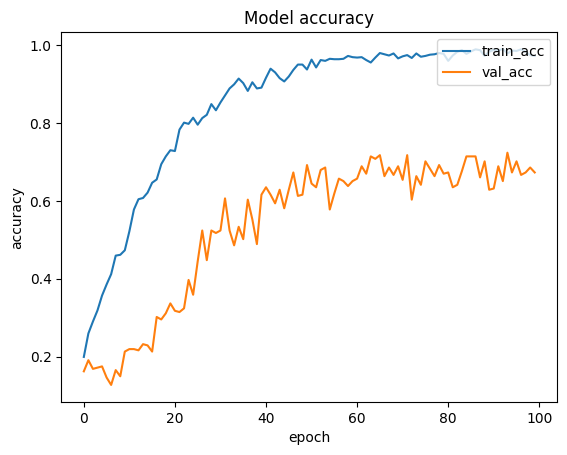

In [30]:
# plot the training artifacts

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

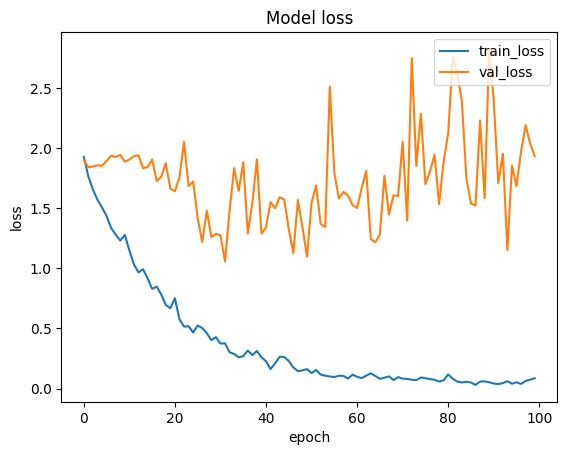

In [31]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [32]:
# predicting on test data.
pred_test = present_model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test_ = encoder.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step


In [33]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,disgust,fear
2,sad,sad
3,surprise,surprise
4,happy,surprise
5,fear,happy
6,disgust,disgust
7,neutral,neutral
8,surprise,surprise
9,happy,fear


In [34]:
print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

       angry       0.85      0.76      0.81        38
     disgust       0.62      0.86      0.72        44
        fear       0.80      0.63      0.71        57
       happy       0.60      0.71      0.65        45
     neutral       0.79      0.64      0.71        36
         sad       0.83      0.76      0.80        51
    surprise       0.67      0.70      0.69        44

    accuracy                           0.72       315
   macro avg       0.74      0.73      0.73       315
weighted avg       0.74      0.72      0.73       315



In [35]:
import librosa
import pandas as pd
import numpy as np
import os

# Path to the dataset
audio_dataset_path = "ALL/"
output_csv_path = "mfcc_features.csv"

# Function to extract MFCCs from audio files
def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)  # Load audio
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs.T, axis=0)  # Take mean across time axis

# Process all audio files in the dataset
data = []
labels = []

for file_name in os.listdir(audio_dataset_path):
    if file_name.endswith(".wav"):  # Assuming .wav files
        file_path = os.path.join(audio_dataset_path, file_name)
        mfcc = extract_mfcc(file_path)
        label = file_name.split("_")[0]  # Adjust based on your labeling system
        data.append(mfcc)
        labels.append(label)

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df['label'] = labels
df.to_csv(output_csv_path, index=False)
print(f"MFCC features saved to {output_csv_path}")


MFCC features saved to mfcc_features.csv


In [36]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load the MFCC features
df = pd.read_csv("mfcc_features.csv")
X = df.iloc[:, :-1].values  # Feature columns
y = df['label'].values      # Labels

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(encoder.classes_)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build a lightweight model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Save the model
model.save("speech_emotion_model.keras")


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2538 - loss: 23.2282 - val_accuracy: 0.2500 - val_loss: 8.5541
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2857 - loss: 9.6136 - val_accuracy: 0.3529 - val_loss: 3.1282
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4821 - loss: 2.2820 - val_accuracy: 0.5000 - val_loss: 1.0945
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5888 - loss: 1.0574 - val_accuracy: 0.7500 - val_loss: 0.6939
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7401 - loss: 0.7242 - val_accuracy: 0.8382 - val_loss: 0.4926
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7474 - loss: 0.5943 - val_accuracy: 0.8088 - val_loss: 0.4923
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7898 - loss: 0.5914 - val_accuracy: 0.8529 - val_loss: 0.3988
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8436 - loss: 0.3834 - val_accuracy: 0.8382 - val_los

In [37]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('speech_emotion_model.keras')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp43t0qya_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 13), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  135649634358608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135649634357264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135649634359184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135649634358800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135649637710544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135649637708624: TensorSpec(shape=(), dtype=tf.resource, name=None)
